# Using the yfinance API in Python to get Financial Data

yfinance is a python API that provides a way to download market data and places it in a pandas dataframe.

In [127]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import mplfinance as mpf

STOCKS = ['BARC.L', 'AZN.L', 'GSK.L', 'ULVR.L', 'DGE.L', 'BP.L', 'SHEL.L', 'RIO.L', 'AAL.L']

start_date = '2020-02-01'
end_date = '2021-10-01'

In [128]:
def get_stocks_data(ticker):
    stocks_data = yf.download(ticker, start='2018-02-01', end=end_date)['Close']
    return stocks_data


[*********************100%***********************]  9 of 9 completed


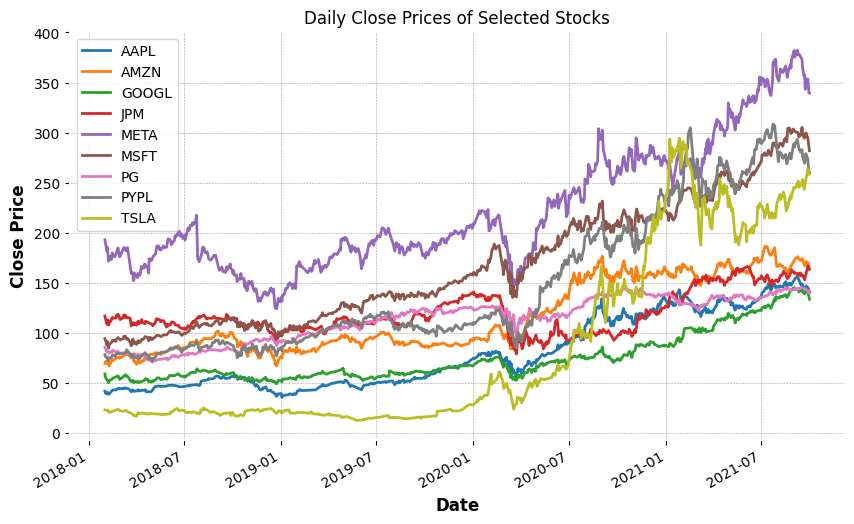

In [129]:
data = get_stocks_data(['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA','JPM', 'PG','PYPL'])
fig, ax = plt.subplots(figsize=(10,6))
data.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Daily Close Prices of Selected Stocks')
plt.show()

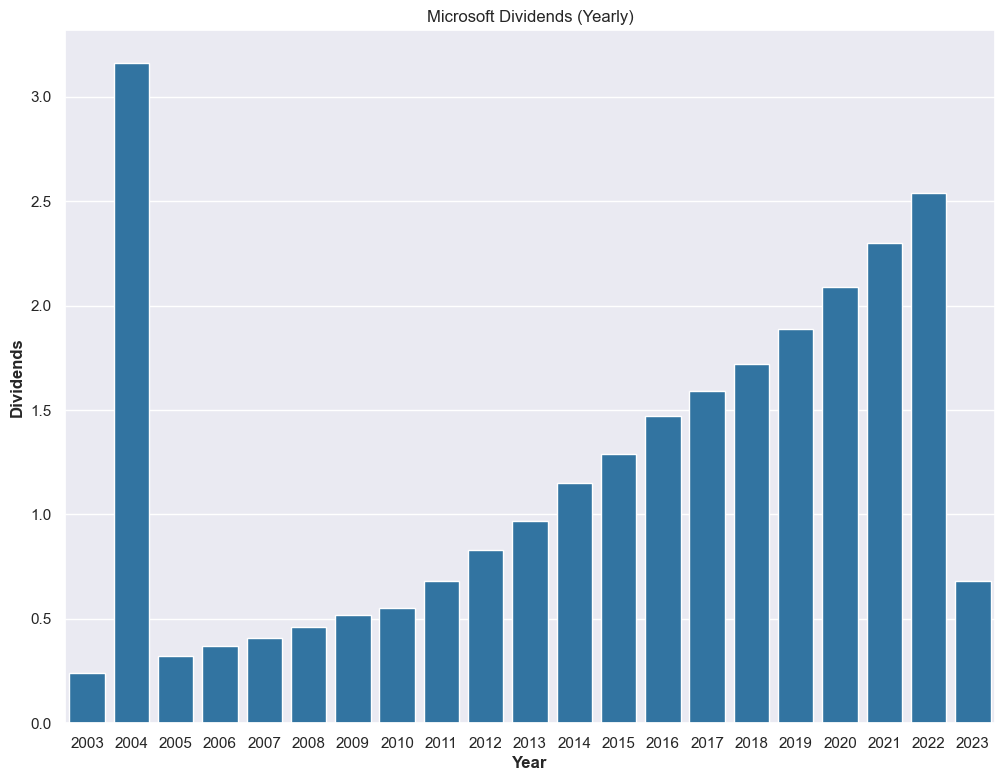

In [140]:
# Download dividend data for Microsoft
msft = yf.Ticker("MSFT")
dividends = msft.dividends

# Resample dividends data to yearly frequency and plot as bar chart
dividends_yr = dividends.resample('Y').sum()
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(x=dividends_yr.index.year, y=dividends_yr.values, color='#1f77b4')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Dividends')
plt.title('Microsoft Dividends (Yearly)')

plt.show()

Dividends are payments made by a company to its shareholders as a portion of the company's profits. 

In 2004, Microsoft announced a special dividend of $3.00 per share, which was paid on December 2, 2004. This special dividend was in addition to the regular quarterly dividends that Microsoft paid during the year. The special dividend was a one-time payment and was intended to distribute some of the company's excess cash to shareholders.

In [131]:
# Get the daily adjusted close prices of the stocks
def get_adj_close_data(ticker):
    stocks_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    stocks_data.rename(columns={'BARC.L': 'Barclays', 'AZN.L': 'AstraZeneca','GSK.L':'GlaxoSmithKline',
                                'ULVR.L': 'Unilever', 'DGE.L': 'Diageo','BP.L':'BP',
                                'SHEL.L':'Shell', 'RIO.L':'Rio Tinto', 'AAL.L':'Anglo American'
                               }, inplace=True)
    return stocks_data

get_adj_close_data(STOCKS)

[*********************100%***********************]  9 of 9 completed


,Anglo American,AstraZeneca,Barclays,BP,Diageo,GlaxoSmithKline,Rio Tinto,Shell,Unilever
Date,,,,,,,,,
2020-02-03,1708.147583,6793.625488,150.602753,378.287872,2869.395508,1497.626343,3383.912109,1718.320557,4079.493652
2020-02-04,1771.675781,6865.607422,152.661926,394.039429,2908.759277,1509.435913,3485.839355,1745.437256,4091.519287
2020-02-05,1776.819702,6982.235840,153.514008,404.693665,2916.632324,1446.729736,3540.946777,1770.891968,4129.375000
2020-02-06,1789.679688,7053.306641,156.851273,396.922333,2965.721680,1409.471924,3555.448730,1757.770874,4182.372070
2020-02-07,1742.526245,7002.281738,157.241791,392.744141,2930.062256,1413.962646,3469.680420,1746.486816,4182.817871
...,...,...,...,...,...,...,...,...,...
2021-09-24,2406.040283,8518.546875,172.079590,299.969177,3384.739258,1298.045044,4437.879395,1445.308960,3773.484863
2021-09-27,2397.705322,8250.805664,175.863205,NaN,3398.340332,1297.296875,4412.614258,1509.956421,3749.841309
2021-09-28,2330.099121,8161.239258,174.495865,315.332977,3424.571045,1293.368896,4387.349121,1551.731812,3794.764160


The daily adjusted close price is useful for historical graphing because it takes into account stock splits, dividends, and other corporate actions that can affect the stock price. 
By adjusting for these factors, the adjusted close price reflects the true value of the stock and allows for accurate analysis of historical price movements.

In [132]:
# Convert the given stock prices to logarithmic returns
def get_log_returns():
    stocks_data = get_adj_close_data(STOCKS)
    log_returns = stocks_data.pct_change()  # calculate logarithmic returns
    log_returns = log_returns[1:]  # removes first row, which are just null values
    return log_returns

get_log_returns()

[*********************100%***********************]  9 of 9 completed


,Anglo American,AstraZeneca,Barclays,BP,Diageo,GlaxoSmithKline,Rio Tinto,Shell,Unilever
Date,,,,,,,,,
2020-02-04,0.037192,0.010596,0.013673,0.041639,0.013718,0.007885,0.030121,0.015781,0.002948
2020-02-05,0.002903,0.016987,0.005581,0.027039,0.002707,-0.041543,0.015809,0.014584,0.009252
2020-02-06,0.007238,0.010179,0.021739,-0.019203,0.016831,-0.025753,0.004096,-0.007409,0.012835
2020-02-07,-0.026347,-0.007234,0.002490,-0.010526,-0.012024,0.003186,-0.024123,-0.006420,0.000106
2020-02-10,-0.008610,0.003253,-0.001468,-0.011489,-0.009167,0.010234,-0.015405,-0.011119,-0.002236
...,...,...,...,...,...,...,...,...,...
2021-09-24,-0.000385,0.020420,-0.001196,0.007710,-0.006133,-0.018387,-0.005661,0.003544,-0.000251
2021-09-27,-0.003464,-0.031430,0.021988,0.000000,0.004018,-0.000576,-0.005693,0.044729,-0.006266
2021-09-28,-0.028196,-0.010856,-0.007775,0.051218,0.007719,-0.003028,-0.005726,0.027667,0.011980


The logarithmic returns of stock prices are useful because they provide a standardised way to measure and compare the performance of different stocks.
They are natural logarithm of the ratio between the current stock price and the previous stock price. By taking the logarithm of the ratio, the returns are converted into a linear scale that can be more easily analyzed and compared.

They are additive, which means that the return of a portfolio can be calculated as the sum of the returns of its individual stocks. This makes it easy to compare the performance of different portfolios.

They are also symmetric, which means that the returns for gains and losses are treated equally. This is important because investors are typically more concerned with minimizing losses than maximizing gains.

Finally, logarithmic returns are normally distributed, which makes them useful for statistical analysis. They can be used to calculate measures of risk and return, such as the Sharpe ratio, which is a commonly used metric for evaluating the performance of investment portfolios.

[*********************100%***********************]  9 of 9 completed


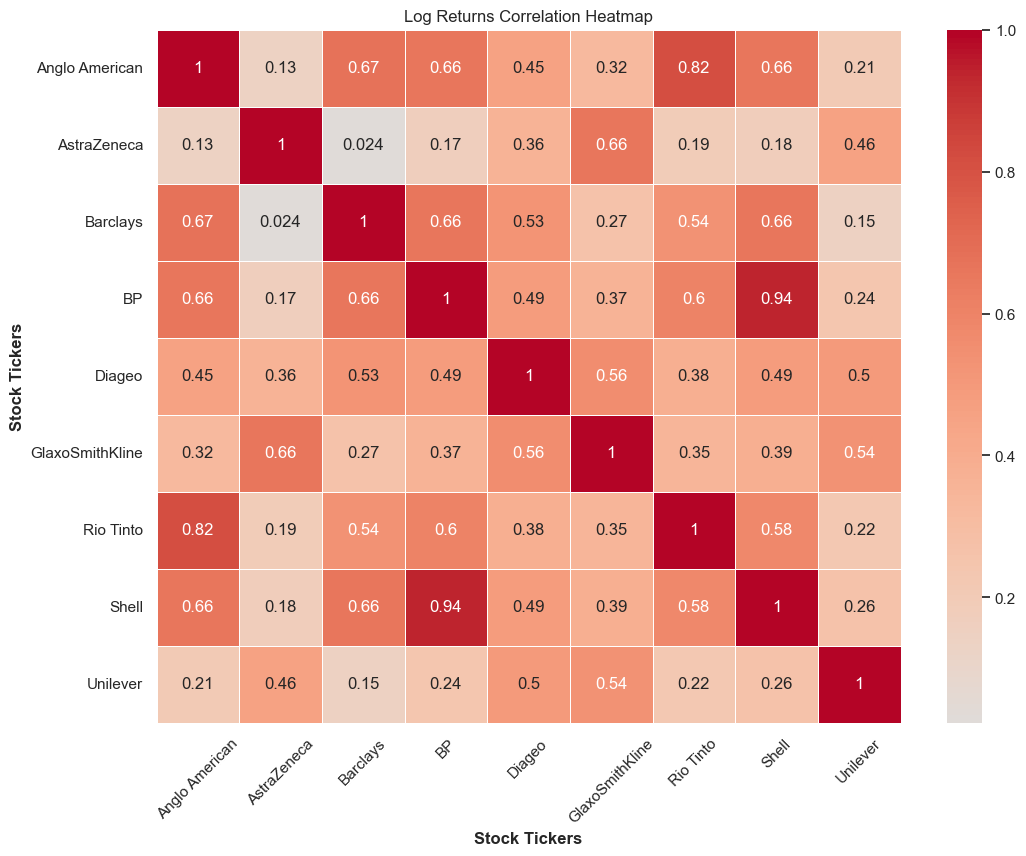

In [133]:
def plot_heatmap():
    # Get the logarithmic returns of the stocks
    log_returns = get_log_returns()

    # Create the heatmap
    sns.set(rc={'figure.figsize':(12,9)})
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    ax = sns.heatmap(log_returns.corr(), annot=True, cmap=cmap, linewidths=.5, center=0)

    # Set the axis labels and title
    ax.set_xlabel("Stock Tickers")
    ax.set_ylabel("Stock Tickers")
    ax.set_title("Log Returns Correlation Heatmap")

    # Rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()
    
plot_heatmap()

Correlation between stocks refers to the degree to which two or more stocks are related to each other. It is a statistical measure that indicates the strength and direction of the linear relationship between the returns of two stocks. The correlation coefficient ranges from -1 to 1, where -1 represents a perfect negative correlation (when one stock goes up, the other goes down), 0 represents no correlation (the stocks move independently), and 1 represents a perfect positive correlation (when one stock goes up, the other goes up). Correlation between stocks is useful for diversification, risk management, and portfolio optimization, as it helps investors understand how different stocks may behave in relation to each other and how they may impact overall portfolio performance.

[*********************100%***********************]  9 of 9 completed


C:\Users\Matthew\AppData\Local\Temp\ipykernel_2320\3281391373.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')


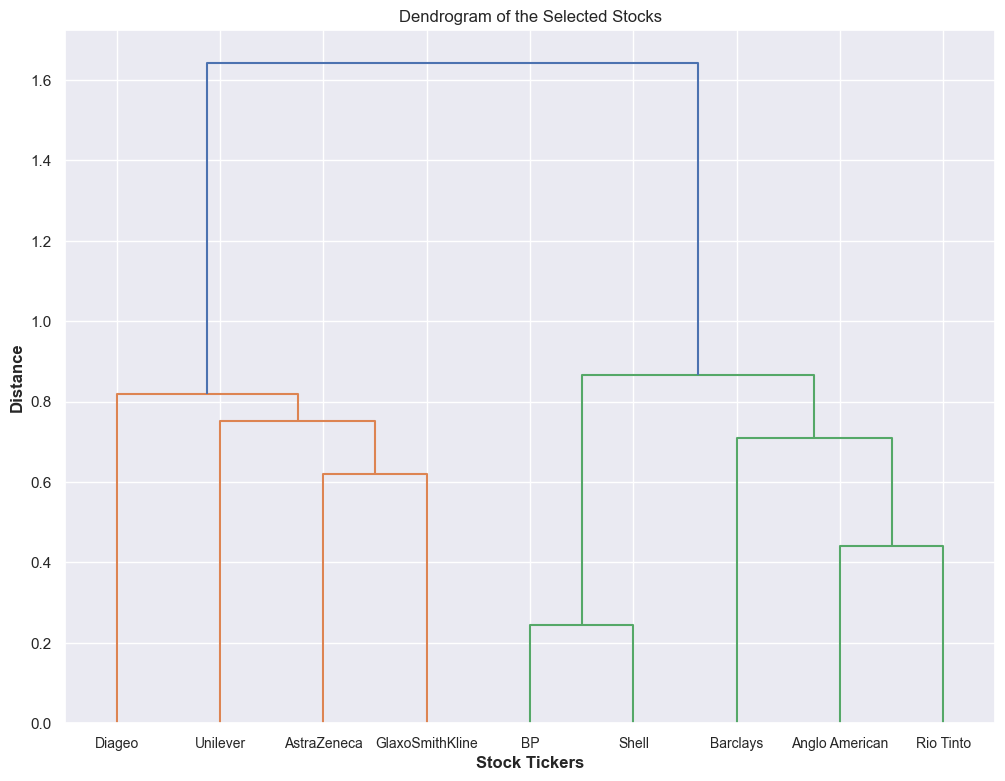

In [134]:
def plot_dendrogram():
    # Get the logarithmic returns of the stocks
    log_returns = get_log_returns()

    # Calculate the distance matrix
    dist_matrix = np.sqrt(((1 - log_returns.corr()) / 2))

    # Perform hierarchical clustering
    linkage_matrix = linkage(dist_matrix, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(12, 9))
    dendrogram(linkage_matrix, labels=log_returns.columns, orientation='top', leaf_font_size=10)
    plt.title('Dendrogram of the Selected Stocks')
    plt.xlabel('Stock Tickers')
    plt.ylabel('Distance')
    plt.show()
    
plot_dendrogram()

[*********************100%***********************]  1 of 1 completed


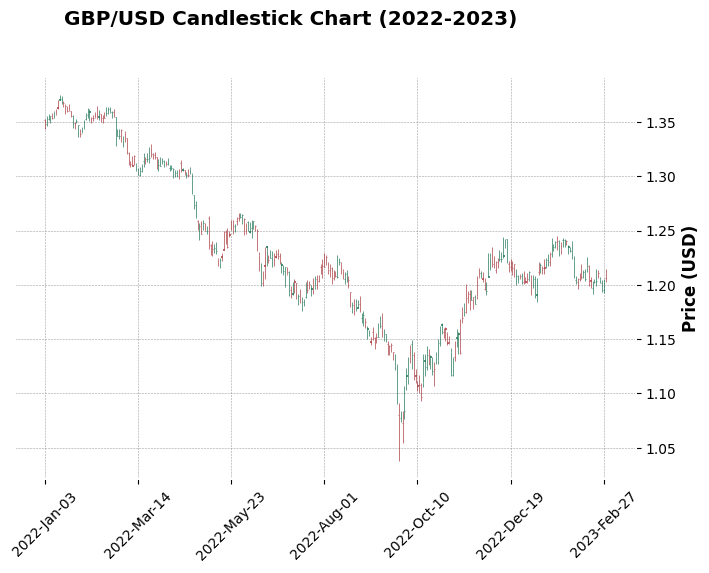

In [135]:
# Retrieve historical data for GBP/USD
gbp = yf.download("GBPUSD=X", start="2022-01-01", end="2023-03-01")

# Create candlestick chart
mpf.plot(gbp, type='candle', style='charles', title='GBP/USD Candlestick Chart (2022-2023)',
         ylabel='Price (USD)', ylabel_lower='Shares\nTraded', figratio=(12,8))